In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [2]:
def c_second(x,a,b,k):
  return (a - b) * ( 1 / ( 1 - b/a * np.exp( - k * x * (a - b) ) ) - 1 )

In [3]:
with open('heck_1.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [4]:
data = np.array(data[0]).astype(float)

In [5]:
xs = np.array(range(len(data)))

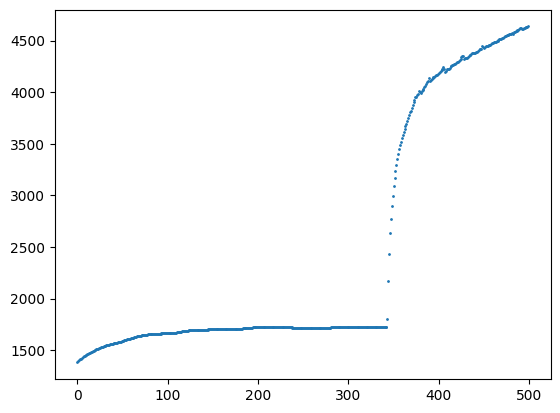

In [6]:
plt.scatter(xs[:500],data[:500],s=1,alpha=1,marker='o')
plt.show()

In [7]:
data[340:360]

array([1726., 1727., 1728., 1805., 2173., 2436., 2635., 2773., 2895.,
       2997., 3087., 3165., 3234., 3296., 3352., 3402., 3446., 3487.,
       3522., 3556.])

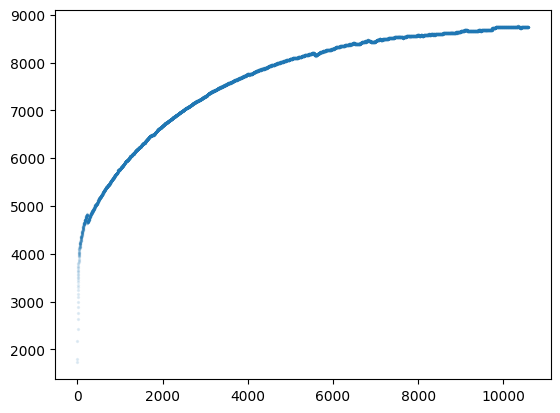

In [10]:
x = xs[342:] - 342 # not certain on start!
y = data[342:] #/ cond_end
plt.scatter(x,y,s=2,alpha=0.1,marker='o')
plt.show()

In [11]:
y[0]

1728.0

In [12]:
len(y)

10589

In [13]:
IR_ = pd.read_csv('heck_1_trends.txt',sep="\t")

In [14]:
IR_

,DateTime,Peak at 1630 cm-1,Peak at 1171 cm-1,Events
0,00:00:24.798,0.001131,0.000091,Sample 1 acquired at 00:00:24
1,00:33:55.371,0.435411,0.012353,NaN
2,00:34:25.309,0.408201,0.011637,Sample 3 acquired at 00:34:25
3,00:34:55.274,0.369653,0.010492,NaN
4,00:35:25.326,0.330930,0.009655,NaN
...,...,...,...,...
432,04:09:26.663,0.106993,0.054572,NaN
433,04:09:56.627,0.104843,0.054604,NaN
434,04:10:26.539,0.103387,0.054580,NaN
435,04:10:56.567,0.101681,0.054585,NaN


<Axes: >

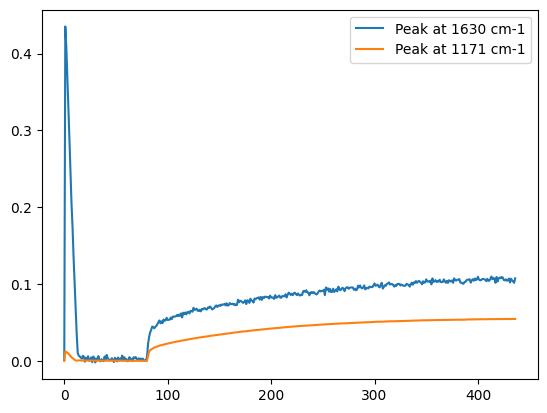

In [15]:
IR_[IR_.columns[1:3]].plot()

In [16]:
ir_1630 = np.array(IR_[IR_.columns[1]])

In [17]:
ir_1630[70:85]

array([0.00252656, 0.00171048, 0.00335901, 0.0022589 , 0.00307627,
       0.00171246, 0.0029722 , 0.        , 0.00034099, 0.0012284 ,
       0.00511246, 0.02172528, 0.03095428, 0.03692703, 0.04022636])

In [18]:
ir_1630 = ir_1630[77:]

In [19]:
ir_1630.shape

(360,)

In [20]:
ir_xs = np.array(range(0,len(ir_1630)*30,30))

In [21]:
ir_1171 = np.array(IR_[IR_.columns[1]])

In [22]:
ir_1171 = ir_1171[77:]

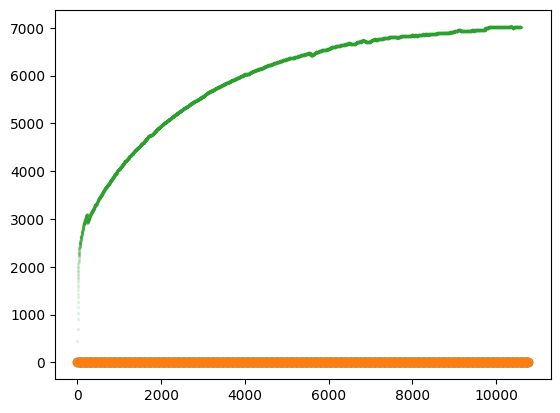

In [23]:
plt.scatter(ir_xs,ir_1630)
plt.scatter(ir_xs,ir_1171)
plt.scatter(x,y - y[0],s=2,alpha=0.1,marker='o')
plt.show()

In [27]:
# lets try some streching!!!
ir_1630_end = np.mean(ir_1630[int(5955/30)-10:int(5955/30)])
ir_1171_end = np.mean(ir_1171[int(5955/30)-10:int(5955/30)])
cond_end = np.mean(y[5956-10:5956] - y[0])

In [29]:
# lets try some streching!!!
ir_1630_end = np.mean(ir_1630[int(10000/30)-10:int(10000/30)])
ir_1171_end = np.mean(ir_1171[int(10000/30)-10:int(10000/30)])
cond_end = np.mean(y[10000-10:10000] - y[0])

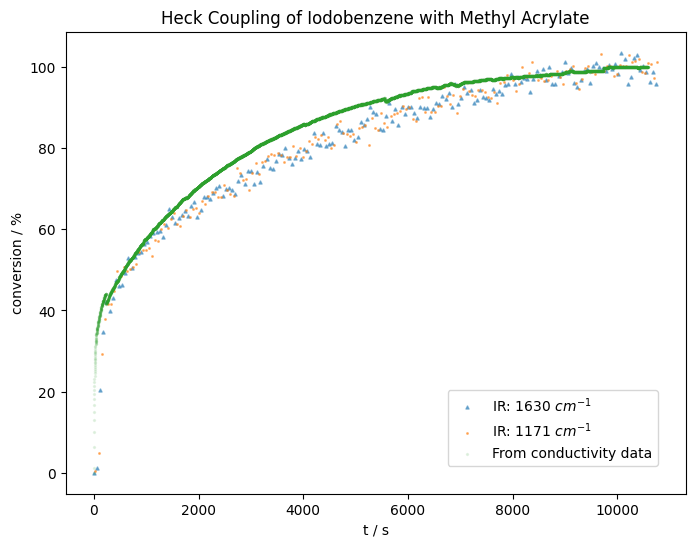

In [31]:
plt.figure(figsize=(8,6))

plt.scatter(ir_xs[::2],100 * ir_1630[::2]/ir_1630_end,s=5,alpha=0.5,marker='^',label='IR: 1630 $cm^{-1}$')
plt.scatter(ir_xs[1::2],100 * ir_1171[1::2]/ir_1171_end,s=5,alpha=0.5,marker='.',label='IR: 1171 $cm^{-1}$')
plt.scatter(x,100 * (y - y[0])/cond_end,s=2,alpha=0.1,marker='o',label='From conductivity data')

plt.legend(loc=4, borderaxespad=2)
plt.title('Heck Coupling of Iodobenzene with Methyl Acrylate')
plt.xlabel('t / s')
plt.ylabel('conversion / %')

plt.show()

In [34]:
sparse_x = x[::10]
sparse_y = 0.101 * (y[::10] - y[0]) / cond_end

In [35]:
sparse_df = pd.DataFrame(sparse_y,sparse_x)

In [36]:
sparse_df.to_csv("heck_for_BM.csv", header=False)